# Data 

The data used is from Seattle's Collision GIS (Geographic Information System), a computer system used for capturing, storing and displaying data related to positions on Earth's surface. The data is from 2004 to the present and contains various features such as location, the severity of the collision, number of vehicles/cyclists/pedestrians involved, date/time of incident, weather, road conditions and more. There are almost 200,000 collisions in the dataset and 38 features. While some of the features won't be useful or have many missing values, the ones that I will explore in more detail will be:
* Severity Code - this will be the target that we'll compare the features' impact on.
* Severity Description - description of the severity codes.
* X and Y values (coordinates) - are there areas where collisions are more concentrated?
* Address Type - alley, block or intersection of collision.
* Collision Type - 10 types of collisions such as parked car, angles, rear end, pedestrian, etc.
* Person Count - # of people involved in collision.
* Pedestrian Count - # of pedestrians involved in collision.
* Cyclist Count - # of cyclists involved in collision.
* Vehicle count - # of vehicles involved in collision.
* Date/Time - are number of or severity of collisions more likely to occur on certain days or times?
* Junction Type - 7 types describing collision at intersection, mid-block, driveway and whether collision is related to intersection.
* Seattle Collision Code - Seattle codes to describe each collision.
* Seattle Collision Description - description of Seattle collision codes.
* Under Influence - was alcohol or drugs involved?
* Weather - do more collisions occur because of adverse weather?
* Road Conditions - do more collisions occur because of adverse road conditions?
* Light Conditions - do more collisions occur because of adverse light conditions?
* State Collision Code - 84 codes the state uses to descibe each collision.
* State Collision Description - description of state collision codes.
* Hit Parked Car - was a parked car involved in the collision?

In the following section I will use graphs to gain insight into the data, and decide which features will be useful when predicting injuries when these collisions occur.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
# Load data into datafram and look at firs 5 collisions
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv', low_memory=False)
df.head()

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  \
0  Matched  Intersection  37475.0   
1  Matched         Block      NaN   
2  Matched         Block      NaN   
3  Matched         Block      NaN   
4  Matched  Intersection  34387.0   

                                      LOCATION EXCEPTRSNCODE EXCEPTRSNDESC  \
0                   5TH AVE NE AND NE 103RD ST                         NaN   
1   AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N           NaN           NaN   
2  4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST           NaN           NaN   
3     2ND AVE BETWEEN MARION ST AND MADISON ST                         NaN   
4              SWIFT AVE S AND SWIFT AV OFF RP           NaN           NaN   

   SEVERITYCODE.1                    SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  \
0               2                Injury Collision        Angles            2   
1               1  Property Damage Only Collision     Sideswipe            2   
2               1  Property Damage Only Collision    Parked Car            4   
3               1  Property Damage Only Collision         Other            3   
4               2                Injury Collision        Angles            2   

   PEDCOUNT  PEDCYLCOUNT  VEHCOUNT                 INCDATE  \
0         0            0         2  2013/03/27 00:00:00+00   
1         0            0         2  2006/12/20 00:00:00+00   
2         0            0         3  2004/11/18 00:00:00+00   
3         0            0         3  2013/03/29 00:00:00+00   
4         0            0         2  2004/01/28 00:00:00+00   

                  INCDTTM                             JUNCTIONTYPE  \
0    3/27/2013 2:54:00 PM   At Intersection (intersection related)   
1   12/20/2006 6:55:00 PM  Mid-Block (not related to intersection)   
2  11/18/2004 10:20:00 AM  Mid-Block (not related to intersection)   
3    3/29/2013 9:26:00 AM  Mid-Block (not related to intersection)   
4    1/28/2004 8:04:00 AM   At Intersection (intersection related)   

   SDOT_COLCODE                                       SDOT_COLDESC  \
0            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
1            16  MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...   
2            14       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END   
3            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   
4            11  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...   

  INATTENTIONIND UNDERINFL   WEATHER ROADCOND                LIGHTCOND  \
0            NaN         N  Overcast      Wet                 Daylight   
1            NaN         0   Raining      Wet  Dark - Street Lights On   
2            NaN         0  Overcast      Dry                 Daylight   
3            NaN         N     Clear      Dry                 Daylight   
4            NaN         0   Raining      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Enterin

In [3]:
print('Number of Features: ', df.shape[1])
print('Number of Recorded Collisions: ',df.shape[0])

Number of Features:  38
Number of Recorded Collisions:  194673


In [4]:
# check number of missing values for each feature

df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [5]:
def plot_bar(data_column, x_label, y_label, title, size=(12,8), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot( x = codes, y = count )
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=20)
    plt.xticks(rotation=rotate)
    plt.show()
    
def plot_barh(data_column, x_label, y_label, title, size=(12,8), rotate=0):
    a = data_column.value_counts()
    codes = a.index
    count = a.values
    plt.figure(figsize=size)
    ax = sns.barplot( x = count, y = codes )
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_title(title, fontsize=20)
    plt.xticks(rotation=rotate)
    plt.show()
    

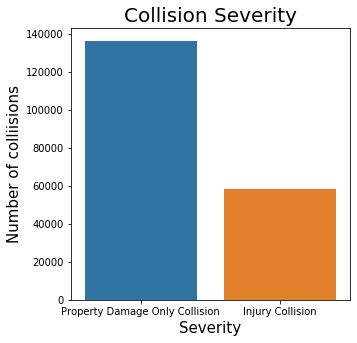

In [6]:
plot_bar(df['SEVERITYDESC'],'Severity','Number of colliisions','Collision Severity', size=(5,5))

In [7]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Gustavo\anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                                4.8.4-py37hc8dfbb8_1 --> 4.8.5-py37hc8dfbb8_1




conda-4.8.5          | 3.1 MB    |            |   0% 
conda-4.8.5          | 3.1 MB    |            |   1% 
conda-4.8.5          | 3.1 MB    | #7         |  18% 
conda-4.8.5          | 3.1 MB    | #######9   |  80% 
conda-4.8.5          | 3.1 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Exec

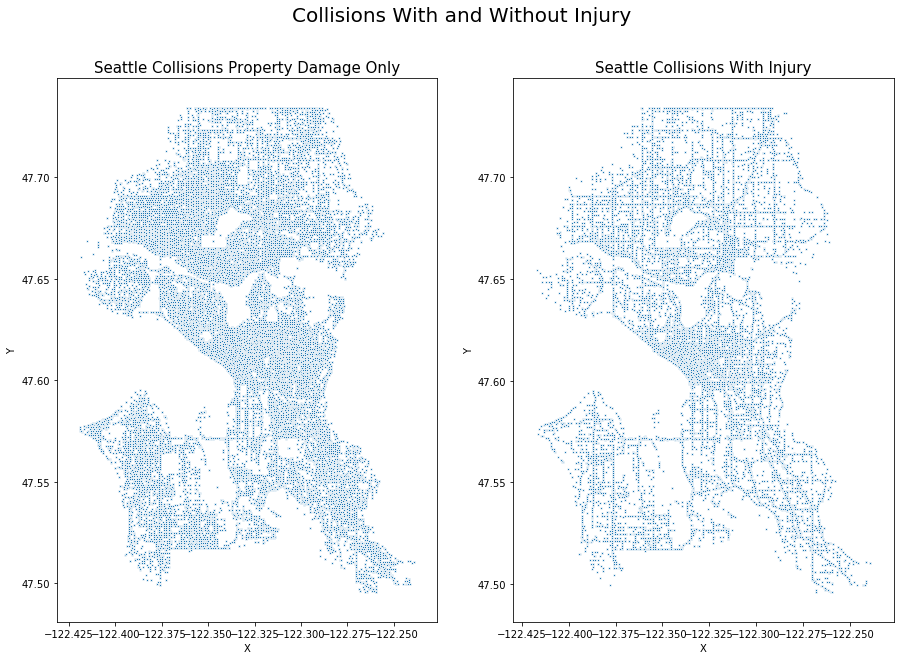

In [8]:
property_damage_df = df.loc[df['SEVERITYCODE']==1]
injury_df = df.loc[df['SEVERITYCODE']==2]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
fig.suptitle('Collisions With and Without Injury', fontsize=20)
ax1 = sns.scatterplot(x=property_damage_df['X'], y=property_damage_df['Y'], s=5, ax=ax1 )
ax1.set_title('Seattle Collisions Property Damage Only', fontsize=15)
ax2 = sns.scatterplot(x=injury_df['X'], y=injury_df['Y'], s=5, ax=ax2)
ax2.set_title('Seattle Collisions With Injury', fontsize=15);


In [9]:
#coordenadas seattle
longitud_seattle =-122.3320700
latitud_seattle = 47.6062100
seattle_map = folium.Map(location=[latitud_seattle, longitud_seattle], zoom_start=11)


In [10]:
print('NAN quantity: ',property_damage_df['X'].isnull().sum())
print('NAN quantity: ',property_damage_df['Y'].isnull().sum())
print('NAN quantity: ',property_damage_df['SEVERITYCODE'].isnull().sum())
property_damage_df = property_damage_df.dropna(axis=0, subset=['X','Y','SEVERITYCODE'])


NAN quantity:  4264
NAN quantity:  4264
NAN quantity:  0


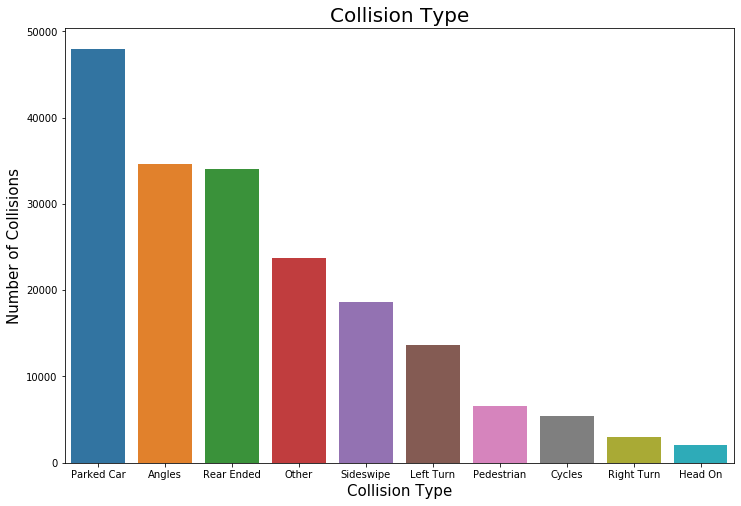

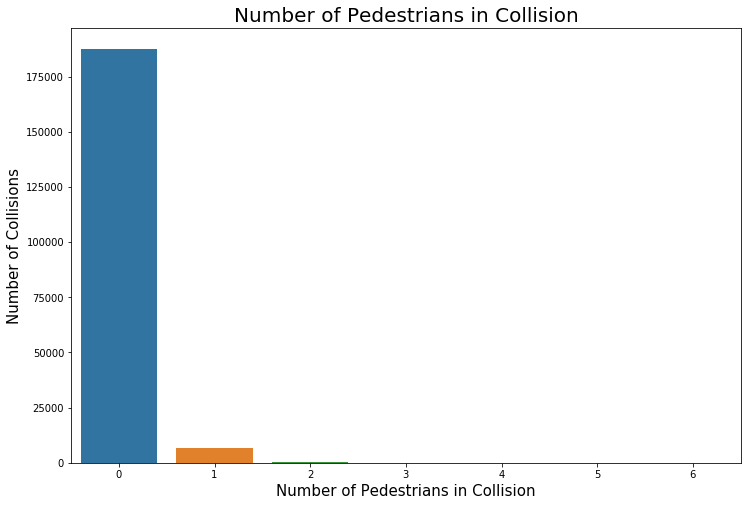

In [11]:
plot_bar(df['COLLISIONTYPE'], 'Collision Type', 'Number of Collisions', 'Collision Type', rotate=0)
plot_bar(df['PEDCOUNT'], 'Number of Pedestrians in Collision', 'Number of Collisions', 'Number of Pedestrians in Collision')


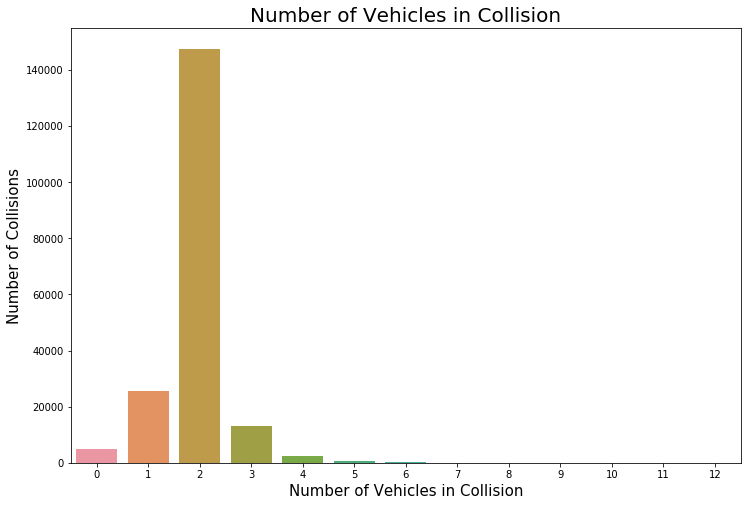

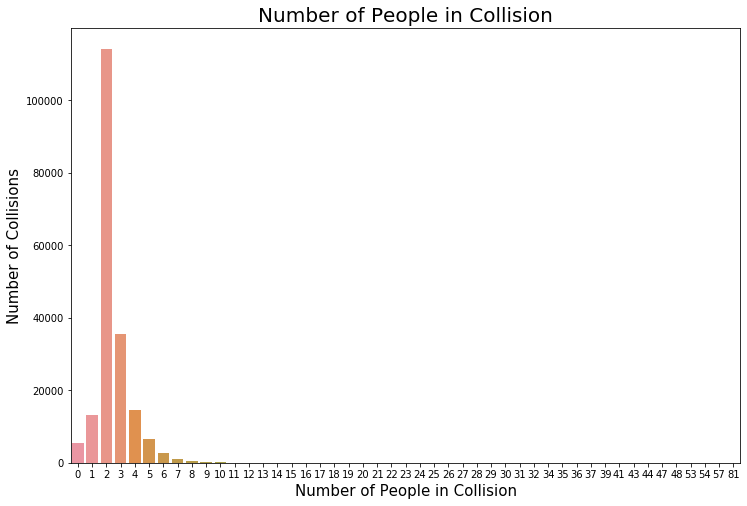

In [12]:
plot_bar(df['VEHCOUNT'], 'Number of Vehicles in Collision', 'Number of Collisions', 'Number of Vehicles in Collision')
plot_bar(df['PERSONCOUNT'], 'Number of People in Collision', 'Number of Collisions', 'Number of People in Collision')

In [13]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], infer_datetime_format=True)
df['Year'] = df['INCDTTM'].dt.year
df['Month'] = df['INCDTTM'].dt.month
df['Day'] = df['INCDTTM'].dt.weekday

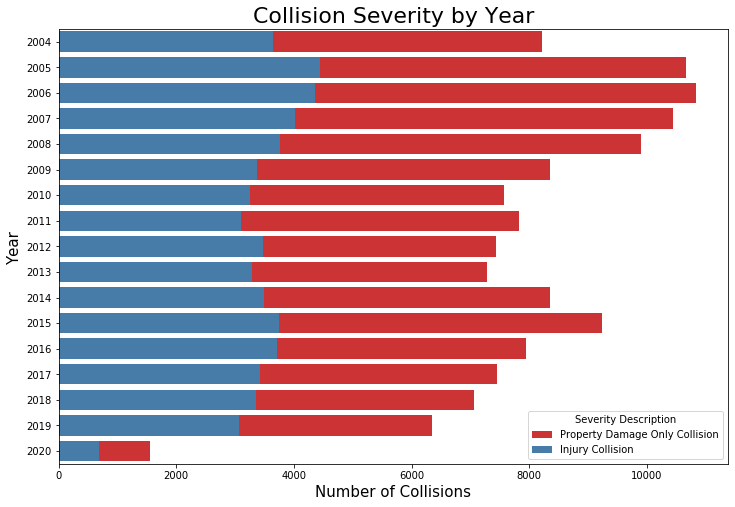

In [14]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y='Year', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False, palette="Set1")
ax.set_ylabel('Year', fontsize=15)
ax.set_xlabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Year', fontsize=22)
ax.legend(title='Severity Description');

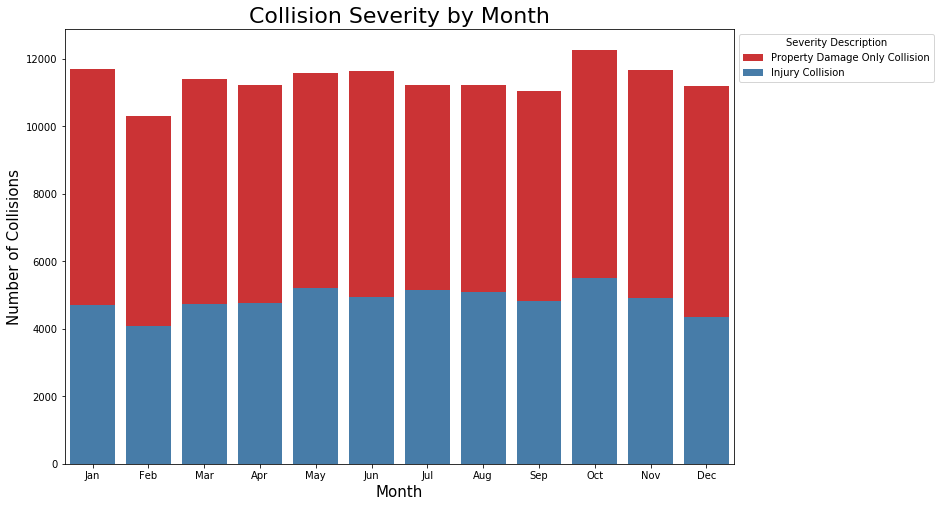

In [15]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Month', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False, palette="Set1")
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Month', fontsize=22)
ax.set_xticklabels(months)
ax.legend(title='Severity Description', bbox_to_anchor=(1,1));

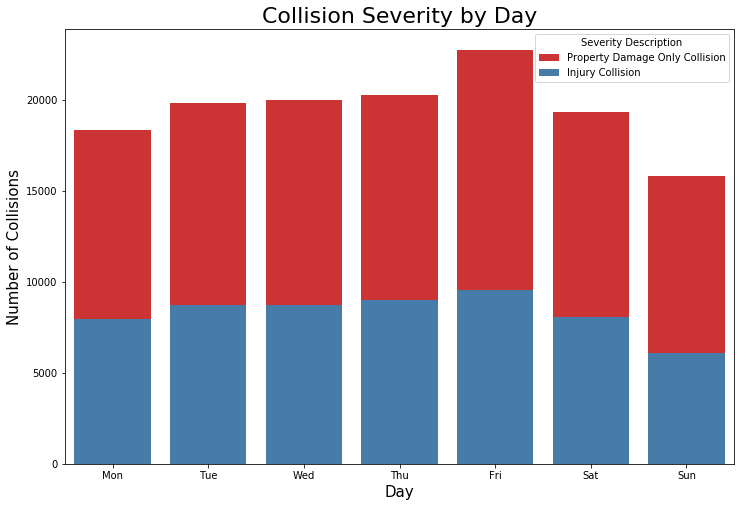

In [16]:
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Day', hue='SEVERITYDESC', data=df,
                   hue_order=['Property Damage Only Collision', 'Injury Collision'], dodge=False, palette="Set1")
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Collisions', fontsize=15)
ax.set_title('Collision Severity by Day', fontsize=22)
ax.set_xticklabels(days)
ax.legend(title='Severity Description');

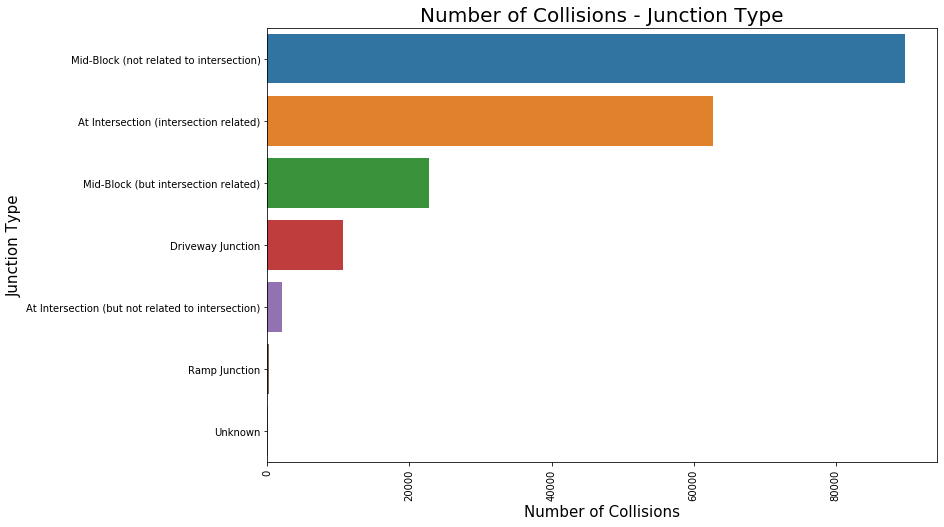

In [17]:
plot_barh(df['JUNCTIONTYPE'], 'Number of Collisions',  'Junction Type', 'Number of Collisions - Junction Type', rotate=90)

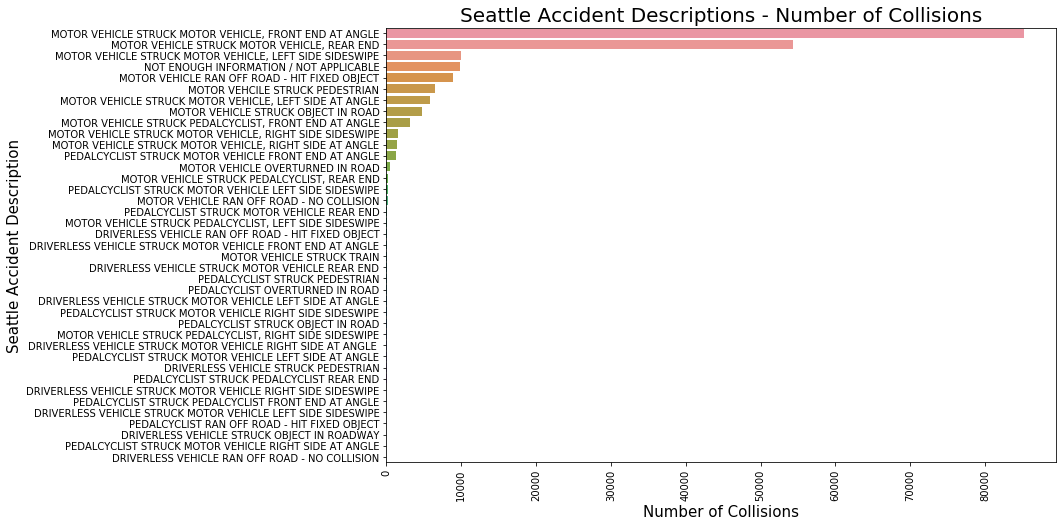

In [18]:
plot_barh(df['SDOT_COLDESC'], 'Number of Collisions',  'Seattle Accident Description','Seattle Accident Descriptions - Number of Collisions', rotate=90)

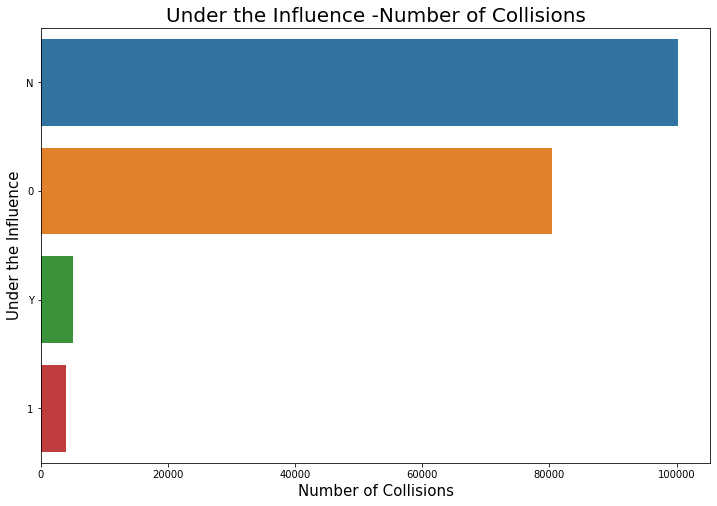

In [19]:
plot_barh(df['UNDERINFL'], 'Number of Collisions',  'Under the Influence','Under the Influence -Number of Collisions')

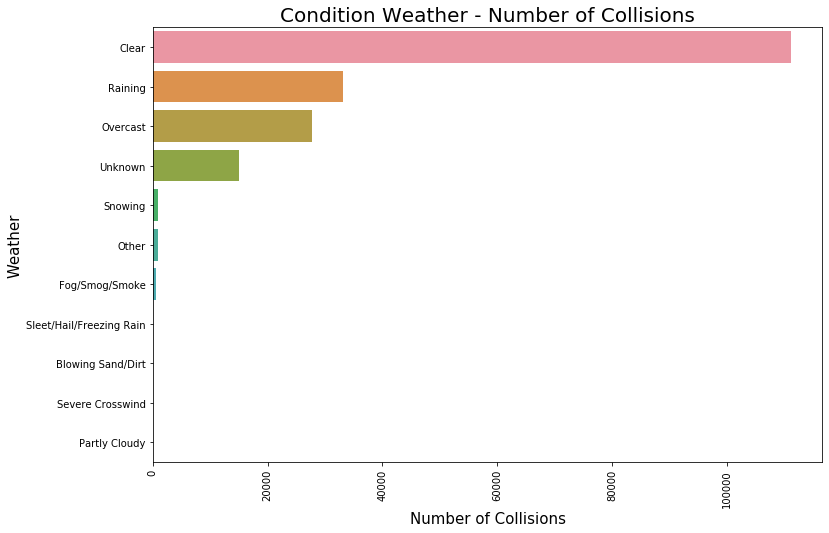

In [20]:
plot_barh(df['WEATHER'], 'Number of Collisions', 'Weather','Condition Weather - Number of Collisions', rotate=90)

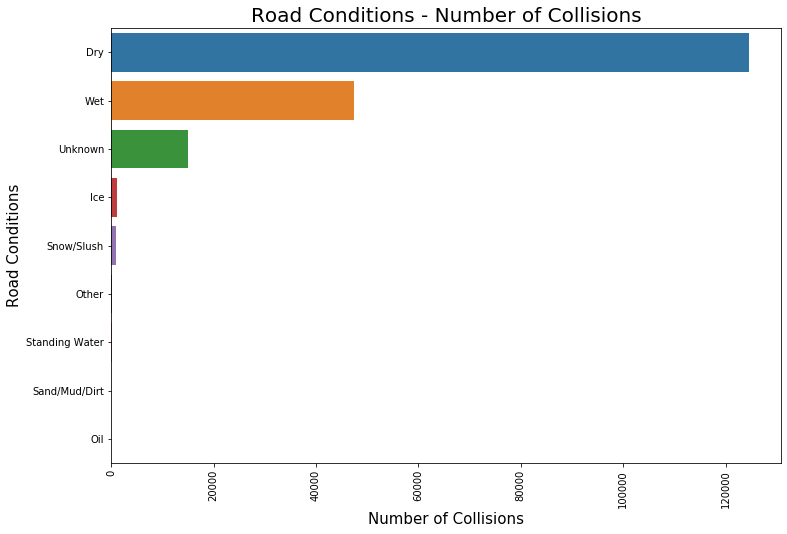

In [21]:
plot_barh(df['ROADCOND'], 'Number of Collisions',  'Road Conditions','Road Conditions - Number of Collisions', rotate=90)

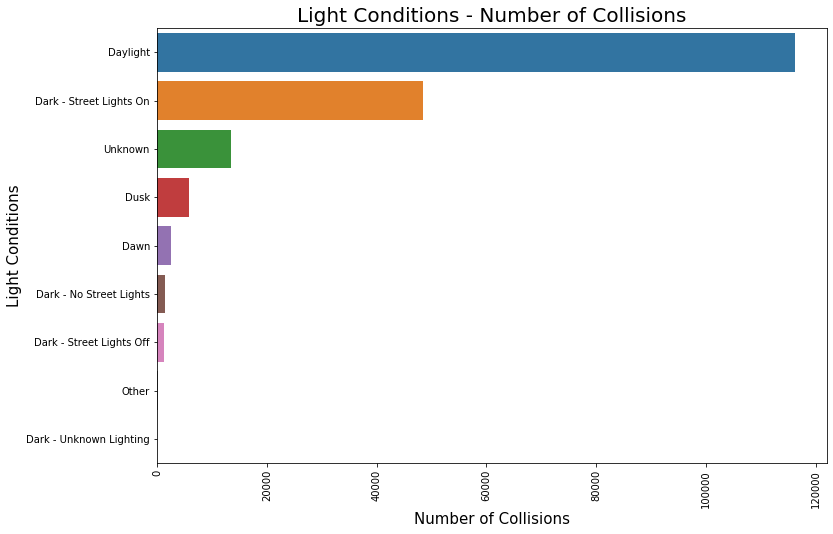

In [22]:
plot_barh(df['LIGHTCOND'], 'Number of Collisions',  'Light Conditions','Light Conditions - Number of Collisions', rotate=90)

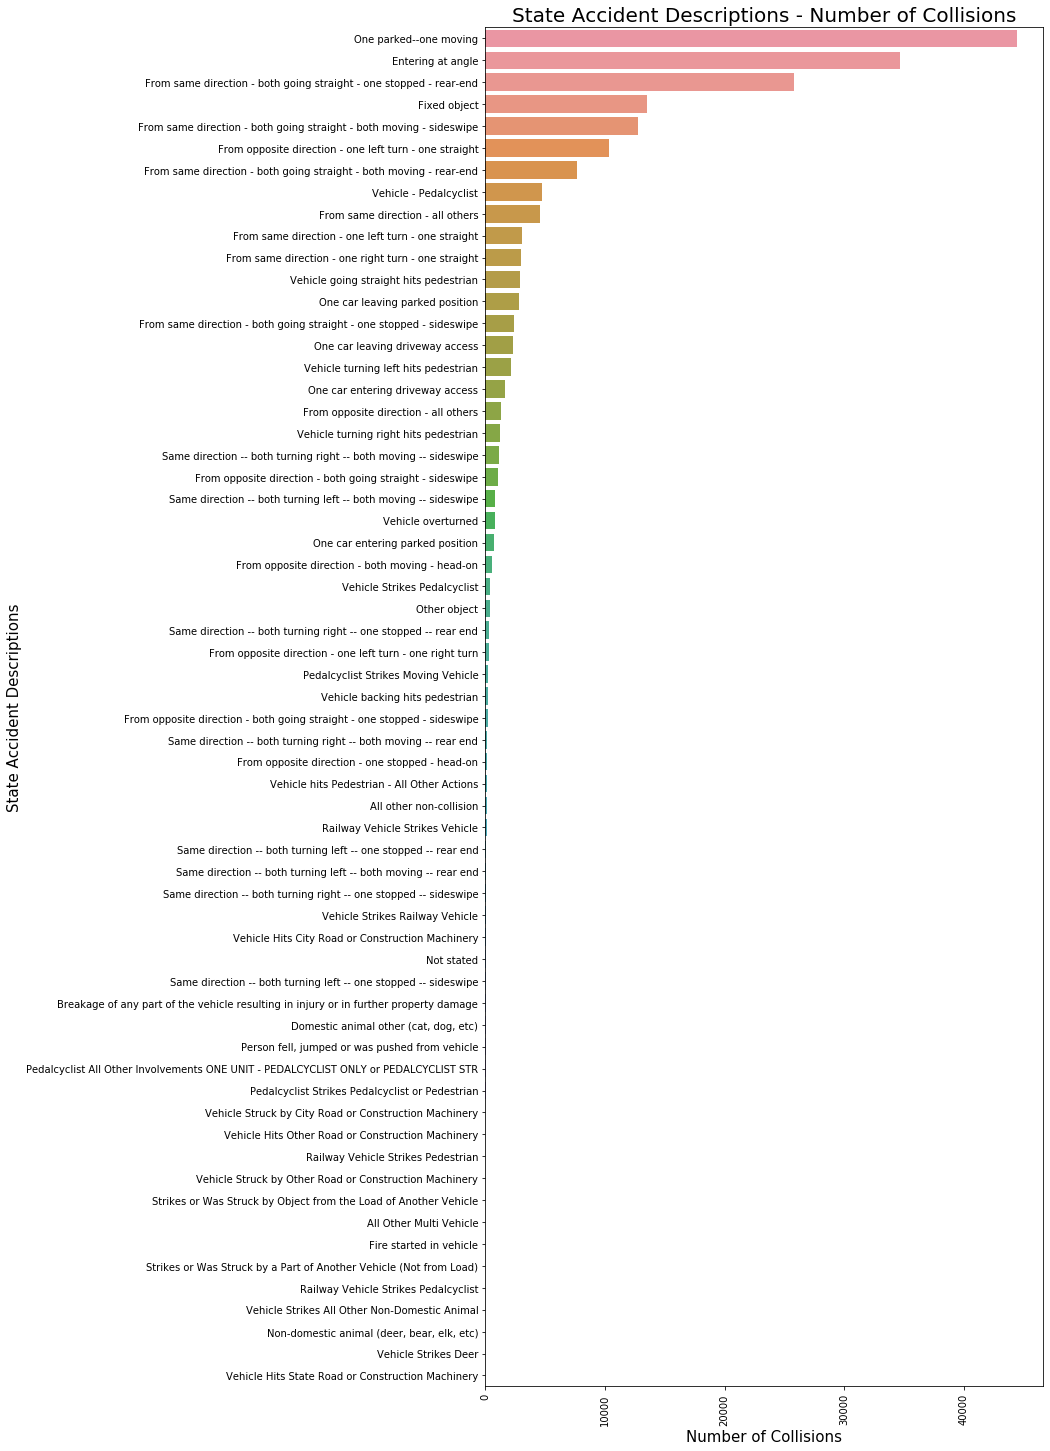

In [23]:
plot_barh(df['ST_COLDESC'], 'Number of Collisions', 'State Accident Descriptions', 'State Accident Descriptions - Number of Collisions', size=(10,25), rotate=90)

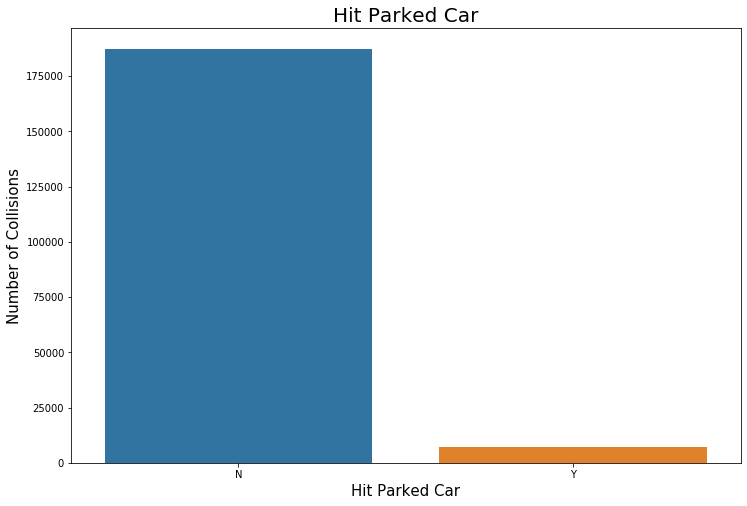

In [24]:
plot_bar(df['HITPARKEDCAR'], 'Hit Parked Car', 'Number of Collisions', 'Hit Parked Car',)

In [25]:
car_velocity = df.loc[df['SPEEDING']=='Y']
car_velocity = car_velocity.dropna(axis=0, subset=['X','Y','SEVERITYCODE'])
print(car_velocity.shape[0])
car_velocity

8720


SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
24                 2 -122.279658  47.553405        33    1268       1268   
43                 2 -122.337348  47.520472        53   56100      56100   
62                 1 -122.376182  47.499490        74   32000      32000   
123                1 -122.333924  47.604678       140   29700      29700   
124                2 -122.322187  47.618733       141    1135       1135   
...              ...         ...        ...       ...     ...        ...   
194385             1 -122.333532  47.690781    219206  308028     309308   
194414             1 -122.293204  47.542648    219238  309651     310931   
194428             2 -122.320008  47.625350    219255  309595     310875   
194481             2 -122.307643  47.541919    219317  308340     309620   
194549             1 -122.346793  47.662069    219399  308693     309973   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  \
24      3672152  Matched  Intersection  33499.0   
43      2619853  Matched         Block      NaN   
62      1215388  Matched         Block      NaN   
123     1482326  Matched         Block      NaN   
124     3605976  Matched  Intersection  29069.0   
...         ...      ...           ...      ...   
194385  3809836  Matched         Block      NaN   
194414  3815072  Matched         Block      NaN   
194428  E881229  Matched  Intersection  28982.0   
194481  3578649  Matched         Block      NaN   
194549  3810502  Matched         Block      NaN   

                                                 LOCATION EXCEPTRSNCODE  \
24                         RAINIER AVE S AND S BRANDON ST                 
43          OLSON PL SW BETWEEN 2ND AVE SW AND 3RD AVE SW           NaN   
62      35TH AVE SW BETWEEN 37TH AVE SW AND MARINE VIE...           NaN   
123                 MARION ST BETWEEN 2ND AVE AND 3RD AVE           NaN   
124                           HARVARD AVE AND E DENNY WAY                 
...                                                   ...           ...   
194385     MERIDIAN AVE N BETWEEN N 85TH ST AND N 86TH ST                 
194414       S HOLLY ST BETWEEN 30TH AVE S AND 31ST AVE S                 
194428                          10TH AVE E AND E ROY E ST                 
194481  AIRPORT WAY S BETWEEN S HARDY ST AND S OTHELLO ST                 
194549  N 46TH ST BETWEEN PHINNEY TURN RD AND GREEN LA...                 

       EXCEPTRSNDESC  SEVERITYCODE.1                    SEVERITYDESC  \
24               NaN               2                Injury Collision   
43               NaN               2                Injury Collision   
62               NaN               1  Property Damage Only Collision   
123              NaN               1  Property Damage Only Collision   
124              NaN               2                Injury Collision   
...              ...             ...                             ...   
194385           NaN               1  Property Damage Only Collision   
194414           NaN               1  Property Damage Only Collision   
194428           NaN               2                Injury Collision   
194481           NaN               2                Injury Collision   
194549           NaN               1  Property Damage Only Collision   

       COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  \
24        Rear Ended            3         0            0         2   
43             Other            1         0            0         1   
62        Parked Car            4         0            0         4   
123       Rear Ended            2         0            0         2   
124           Angles            2         0            0         2   
...              ...          ...       ...          ...       ...   
194385    Rear Ended            3         0            0         3   
194414    Parked Car            2         0            0         2   
194428    Pedestrian            2         1            0         1   
194481         O

In [26]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [27]:
latitude = 47.6062100
longitude = -122.3320700
# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of seattle


In [28]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 8720 incidents feature group
for lat, lng, in zip(car_velocity.Y, car_velocity.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='Red',
            fill=False,
            
        )
    )

# add incidents to map
seattle_map.add_child(incidents)

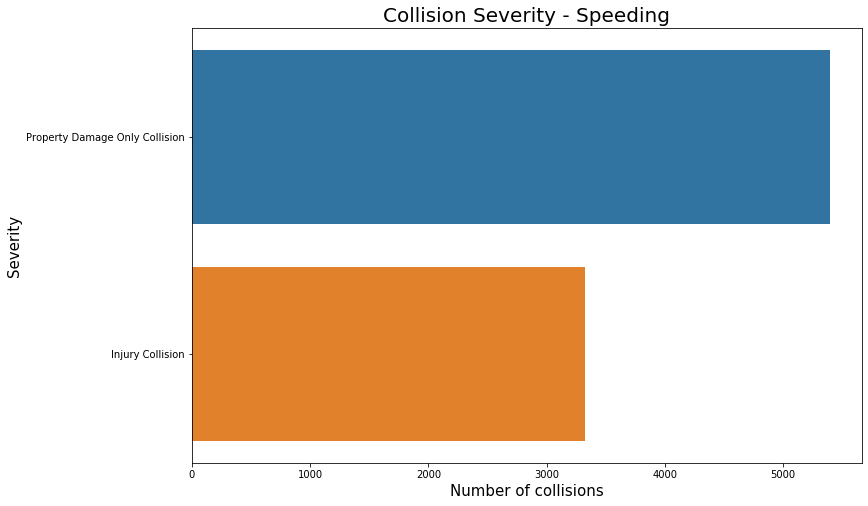

In [29]:
plot_barh(car_velocity['SEVERITYDESC'],'Number of collisions','Severity','Collision Severity - Speeding' )

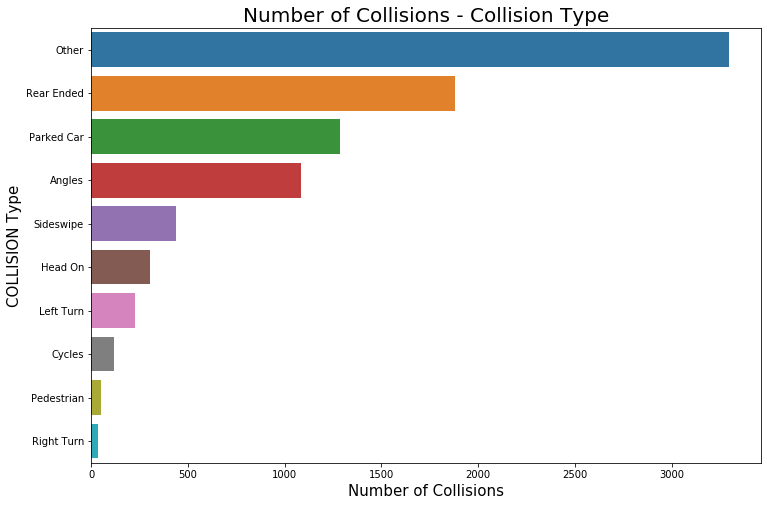

In [30]:
plot_barh(car_velocity['COLLISIONTYPE'], 'Number of Collisions',  'COLLISION Type', 'Number of Collisions - Collision Type')

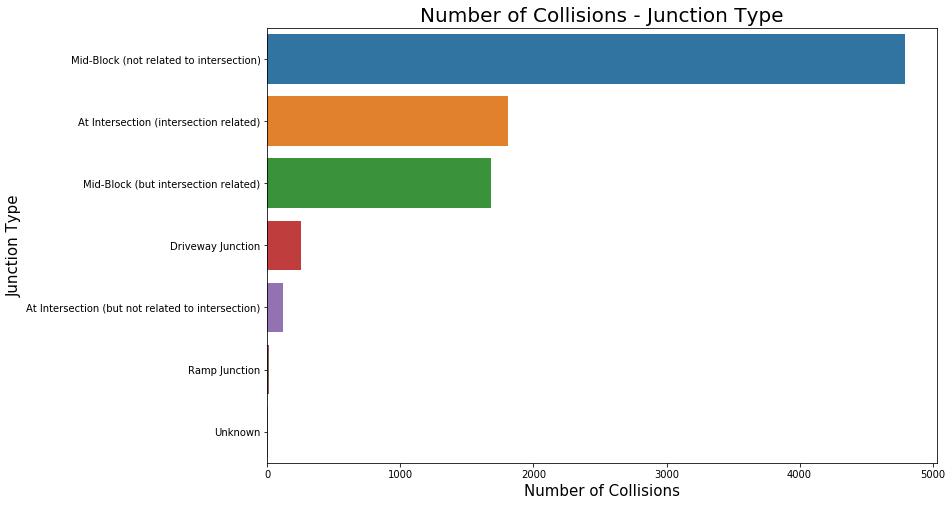

In [31]:
plot_barh(car_velocity['JUNCTIONTYPE'], 'Number of Collisions',  'Junction Type', 'Number of Collisions - Junction Type')

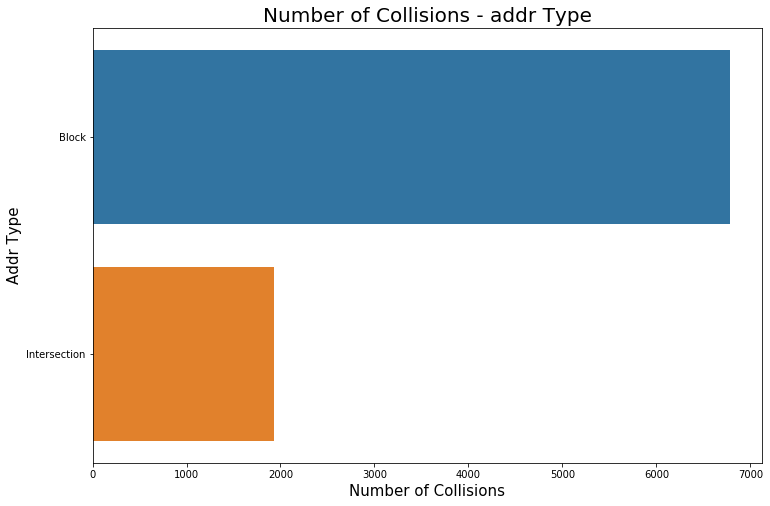

In [32]:
plot_barh(car_velocity['ADDRTYPE'], 'Number of Collisions',  'Addr Type', 'Number of Collisions - addr Type')